<a href="https://colab.research.google.com/github/Roz1t/Math208/blob/main/MATH208_week_5_q_1_19951_rozit_lopchan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Statistics for Glucose:
Mean: 130.06666666666666
Variance: 1075.0298850574711
Standard Deviation: 32.787648361196496
Z-scores: [0.5469539363047783, -1.3745013417919332, 1.6144290908029513, -1.2525041812778563, 0.21146174489106678, -0.4290233478078371, -1.5879963726915678, -0.4595226379363563, 2.0414191526022205, -0.15452973665116398, -0.6120190885789525, 1.156939738875163, 0.27246032514810525, 1.7974248315740669, 1.0959411586181245, -0.9170119898641448, -0.3680247675507986, -0.7035169589645102, -0.8255141194785871, -0.4595226379363563, -0.12403044652264475, -0.9475112799926639, 2.0109198624737012, -0.33752547742227934, 0.39445748566218214, -0.15452973665116398, 0.5164546461762591, -1.0085098602497025, 0.4554560659192206, -0.3985240576793178]
Q1: 105.0
Median (Q2): 122.0
Q3: 146.0

Statistics for Blood Pressure:
Mean: 68.53333333333333
Variance: 572.119540229885
Standard Deviation: 23.91902046969911
Z-scores: [0.14493347129571138, -0.10591292133148125, -0.18952838554054546, -0.105912921

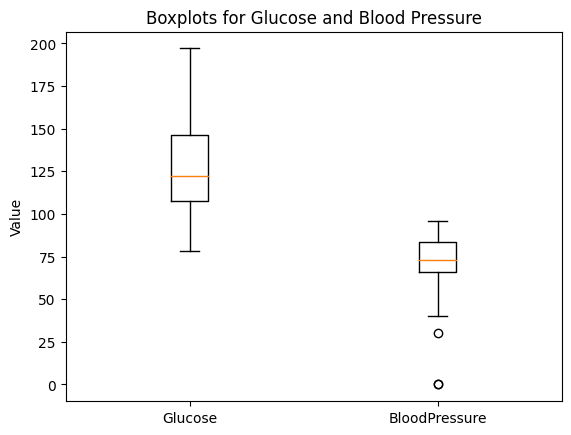

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_mean(data):
    return sum(data) / len(data)

def calculate_variance(data, mean):
    return sum((x - mean) ** 2 for x in data) / (len(data) - 1)

def calculate_standard_deviation(variance):
    return variance ** 0.5

def calculate_z_scores(data, mean, std_dev):
    return [(x - mean) / std_dev for x in data]

def calculate_quartiles_and_median(data):
    sorted_data = sorted(data)

    n = len(sorted_data)
    middle = n // 2

    if n % 2 == 0:
        lower_half = sorted_data[:middle]
        upper_half = sorted_data[middle:]
        q1 = (lower_half[len(lower_half) // 2 - 1] + lower_half[len(lower_half) // 2]) / 2
        median = (sorted_data[middle - 1] + sorted_data[middle]) / 2
        q3 = (upper_half[len(upper_half) // 2 - 1] + upper_half[len(upper_half) // 2]) / 2
    else:
        lower_half = sorted_data[:middle]
        upper_half = sorted_data[middle + 1:]
        q1 = (lower_half[len(lower_half) // 2 - 1] + lower_half[len(lower_half) // 2]) / 2
        median = sorted_data[middle]
        q3 = (upper_half[len(upper_half) // 2 - 1] + upper_half[len(upper_half) // 2]) / 2

    return q1, median, q3

df = pd.read_excel("original_diabetes.xlsx")

df.dropna(subset=["Glucose", "BloodPressure"], inplace=True)

glucose_data = df["Glucose"]
blood_pressure_data = df["BloodPressure"]

glucose_mean = calculate_mean(glucose_data)
glucose_variance = calculate_variance(glucose_data, glucose_mean)
glucose_std_dev = calculate_standard_deviation(glucose_variance)
glucose_z_scores = calculate_z_scores(glucose_data, glucose_mean, glucose_std_dev)
glucose_q1, glucose_median, glucose_q3 = calculate_quartiles_and_median(glucose_data)

bp_mean = calculate_mean(blood_pressure_data)
bp_variance = calculate_variance(blood_pressure_data, bp_mean)
bp_std_dev = calculate_standard_deviation(bp_variance)
bp_z_scores = calculate_z_scores(blood_pressure_data, bp_mean, bp_std_dev)
bp_q1, bp_median, bp_q3 = calculate_quartiles_and_median(blood_pressure_data)

print("Statistics for Glucose:")
print("Mean:", glucose_mean)
print("Variance:", glucose_variance)
print("Standard Deviation:", glucose_std_dev)
print("Z-scores:", glucose_z_scores)
print("Q1:", glucose_q1)
print("Median (Q2):", glucose_median)
print("Q3:", glucose_q3)

print("\nStatistics for Blood Pressure:")
print("Mean:", bp_mean)
print("Variance:", bp_variance)
print("Standard Deviation:", bp_std_dev)
print("Z-scores:", bp_z_scores)
print("Q1:", bp_q1)
print("Median (Q2):", bp_median)
print("Q3:", bp_q3)

plt.boxplot([glucose_data, blood_pressure_data], labels=["Glucose", "BloodPressure"])
plt.title("Boxplots for Glucose and Blood Pressure")
plt.ylabel("Value")
plt.show()
